In [1]:
%pylab inline 
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [6]:
from py_files.Plot_rating import plot_rating, describe_df, red_df, white_df, sparkling_df

Lowest rated:                Name  Year   Price  Rating  Review Country
314      Tinto N.V.  9999   39.95     3.3    1326   Spain
345  7 Fuentes 2017  2017  150.00     3.3    1237   Spain 

Highest rated:                                                  Name  Year   Price  Rating  \
20  Gran Enemigo Single Vineyard Gualtallary Caber...  2015  599.95     4.7   
35                              Malbec Argentino 2017  2017  625.00     4.7   
76  Gran Enemigo Single Vineyard Gualtallary Caber...  2016  599.95     4.7   

    Review    Country  
20    5610  Argentina  
35    4562  Argentina  
76    3067  Argentina  


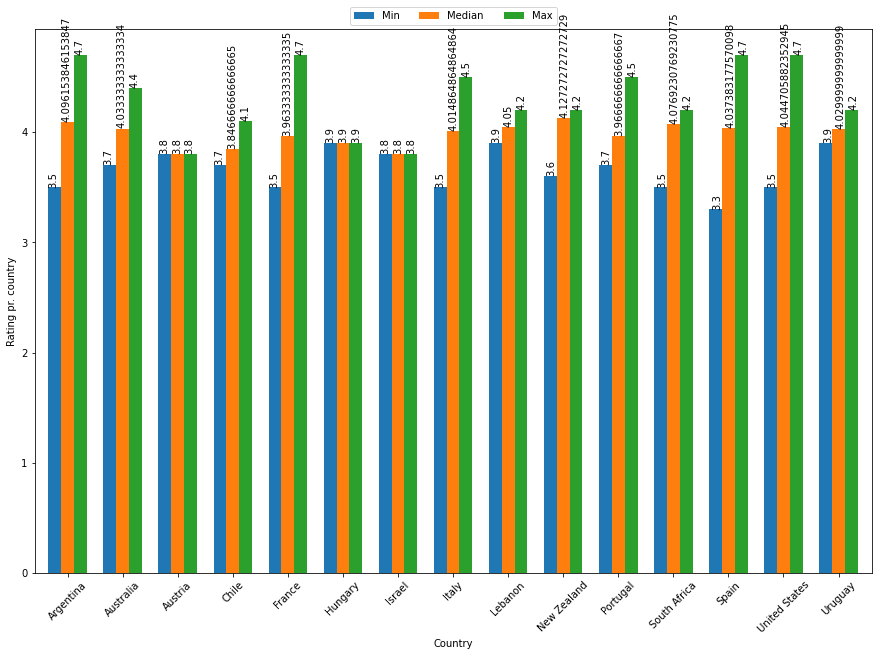

In [7]:
df = pd.read_csv('vinData.csv', names=["Name", "Year", "Price", "Rating", "Review", "Country"])
#df
plot_rating(df)

In [10]:
from sklearn import preprocessing
import numpy as np
df = pd.read_csv('RedWineWithNotes.csv')
# Convert species to 0, 1 or 2
label_enc =preprocessing.LabelEncoder()
df['Name'] = label_enc.fit_transform(df['Name'].astype(str))
df.drop(df[df.Boldness < 1].index, inplace=True)
df

,Name,Year,Price,Rating,Country,Winetype,Boldness,Sweetness,Acidity,Link
1,150,2017,129.95,4.5,Chile,Red wine,82.6664,10.88520,42.5419,https://www.vivino.com/DK/en/caballo-loco-gran...
2,122,2020,149.00,4.5,Italy,Red wine,69.7346,27.47380,31.8676,https://www.vivino.com/DK/en/farnese-edizione-...
3,230,2017,149.00,4.4,Italy,Red wine,68.2935,44.64920,10.5798,https://www.vivino.com/DK/en/varvaglione-papal...
4,149,2017,129.95,4.4,Chile,Red wine,81.4937,17.27570,44.5259,https://www.vivino.com/DK/en/caballo-loco-gran...
5,146,2018,169.00,4.4,Spain,Red wine,84.5330,22.22700,43.4561,https://www.vivino.com/DK/en/morca-godina-garn...
...,...,...,...,...,...,...,...,...,...,...
394,262,2011,175.00,4.0,South Africa,Red wine,76.6888,8.21591,49.9332,https://www.vivino.com/DK/en/za-rijks-private-...
395,153,2013,179.00,4.0,France,Red wine,61.6996,12.41940,55.7223,https://www.vivino.com/DK/en/saint-martin-de-l...
396,368,2018,154.95,4.0,France,Red wine,64.6207,3.54856,52.1423,https://www.vivino.com/DK/en/megaphone-ventoux...
398,358,2016,199.00,4.0,France,Red wine,65.4938,5.48697,56.8012,https://www.vivino.com/DK/en/domaine-de-la-cha...


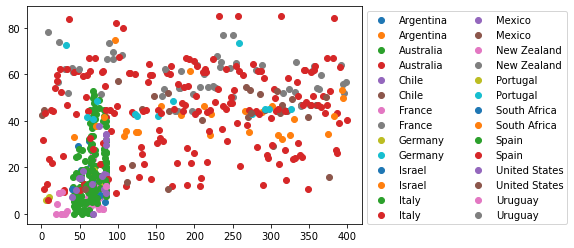

In [11]:
groups = df.groupby('Country')

for name, group in groups:
    plt.plot(group['Boldness'], group['Sweetness'], group['Acidity'], marker='o', linestyle='', label=name)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)